In [31]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [32]:
%%time
train = pd.read_parquet('train_data.parquet', engine='fastparquet')
test = pd.read_parquet('test_data.parquet', engine='fastparquet')

CPU times: user 86.8 ms, sys: 8 ms, total: 94.8 ms
Wall time: 144 ms


In [33]:
train.head()
test.head()

,driver_id,date,online_hours,gender,age,number_of_kids,weekday
index,,,,,,,
0,111556,2017-06-01,2.0,FEMALE,49,4,3
1,111556,2017-06-02,2.0,FEMALE,49,4,4
2,111556,2017-06-03,0.0,FEMALE,49,4,5
3,111556,2017-06-04,0.0,FEMALE,49,4,6
4,111556,2017-06-05,5.0,FEMALE,49,4,0


,driver_id,date,online_hours,gender,age,number_of_kids,weekday
index,,,,,,,
0,979863,2017-06-28,7,MALE,26,2,2
1,979863,2017-06-27,9,MALE,26,2,1
2,979863,2017-06-26,9,MALE,26,2,0
3,979863,2017-06-25,10,MALE,26,2,6
4,979863,2017-06-24,9,MALE,26,2,5


In [34]:
## Removing date 22nd June 2017
train = train.loc[train['date'] != '2017-06-22']
train.date.max()

Timestamp('2017-06-21 00:00:00')

In [36]:
train.date.unique()

array(['2017-06-01T00:00:00.000000000', '2017-06-02T00:00:00.000000000',
       '2017-06-03T00:00:00.000000000', '2017-06-04T00:00:00.000000000',
       '2017-06-05T00:00:00.000000000', '2017-06-06T00:00:00.000000000',
       '2017-06-07T00:00:00.000000000', '2017-06-08T00:00:00.000000000',
       '2017-06-09T00:00:00.000000000', '2017-06-10T00:00:00.000000000',
       '2017-06-11T00:00:00.000000000', '2017-06-12T00:00:00.000000000',
       '2017-06-13T00:00:00.000000000', '2017-06-14T00:00:00.000000000',
       '2017-06-15T00:00:00.000000000', '2017-06-16T00:00:00.000000000',
       '2017-06-17T00:00:00.000000000', '2017-06-18T00:00:00.000000000',
       '2017-06-19T00:00:00.000000000', '2017-06-20T00:00:00.000000000',
       '2017-06-21T00:00:00.000000000'], dtype='datetime64[ns]')

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

/Users/vikash/anaconda/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


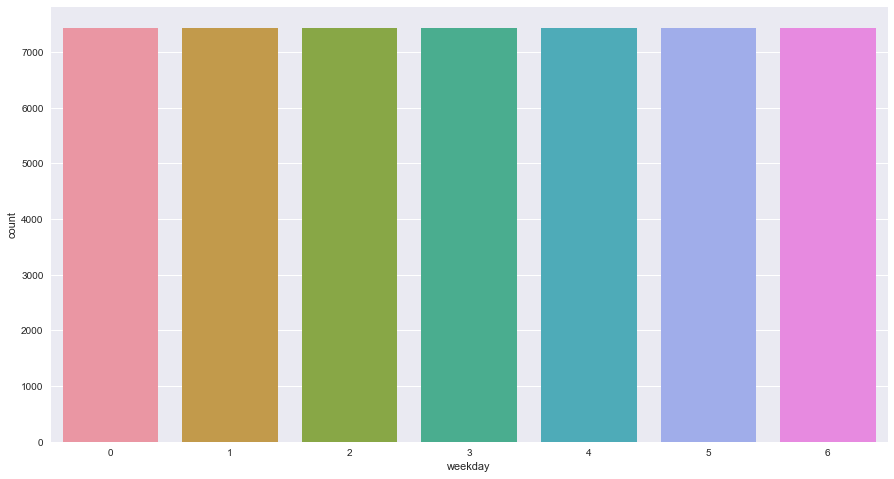

In [38]:
plt.figure(figsize=(15,8))
sns.countplot(x="weekday", data=train)
#sns.countplot(x="weekday", data=test)

/Users/vikash/anaconda/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


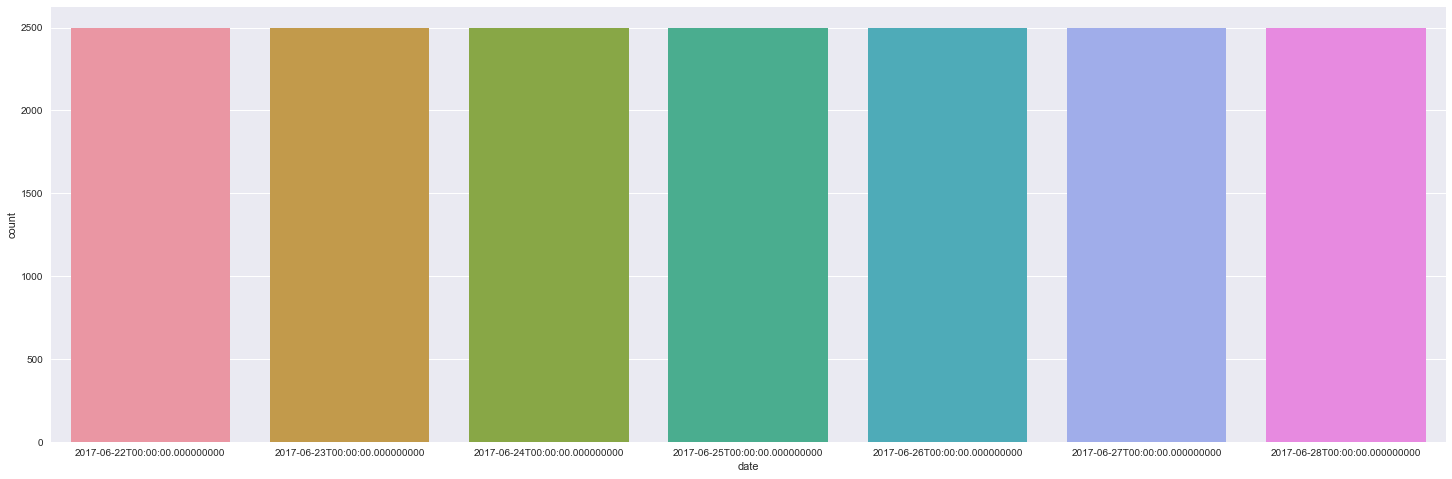

In [29]:
plt.figure(figsize=(25,8))
sns.countplot(x="date", data=test)

/Users/vikash/anaconda/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


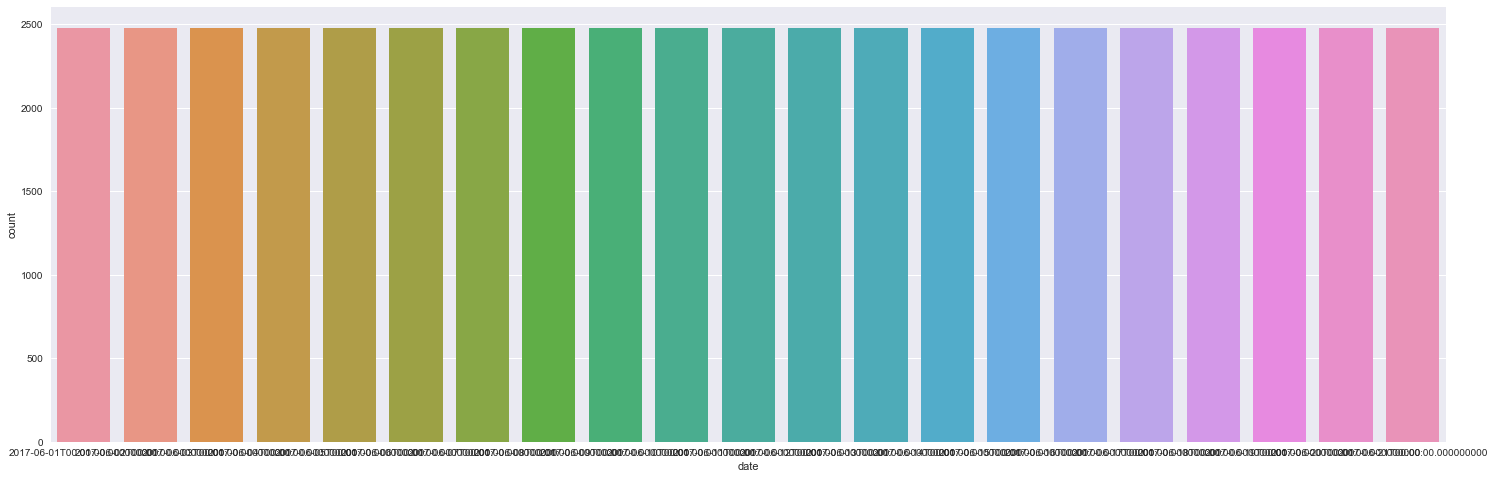

In [40]:
plt.figure(figsize=(25,8))
sns.countplot(x="date", data=train)

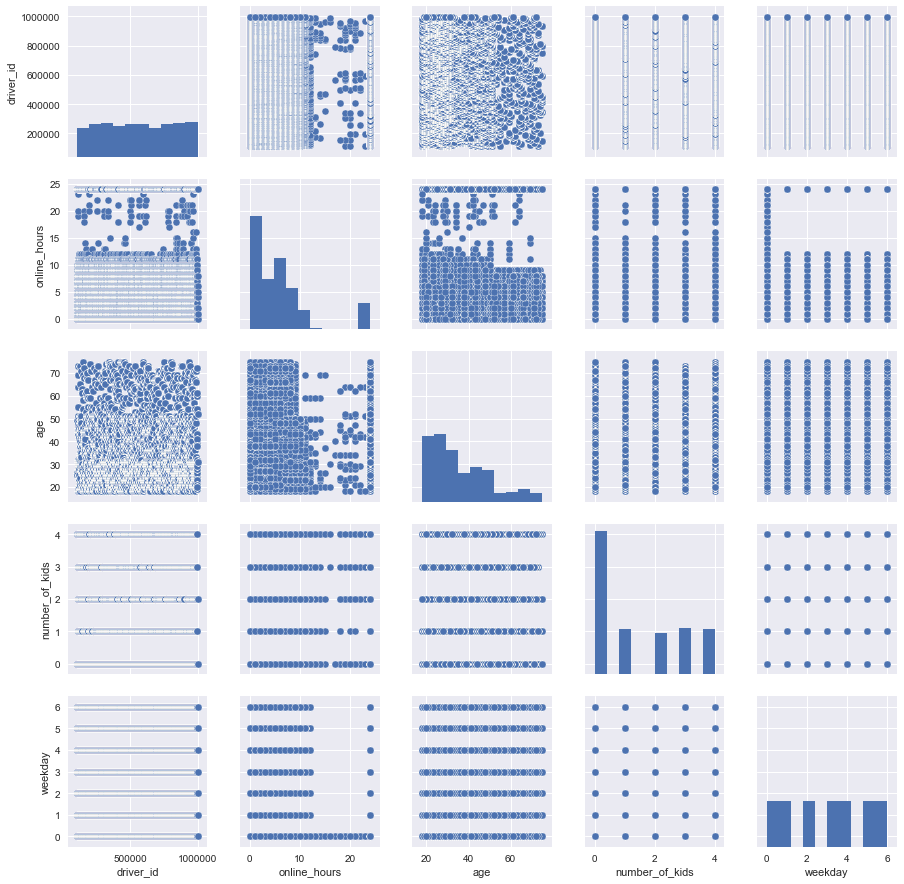

In [41]:
sns.pairplot(train)

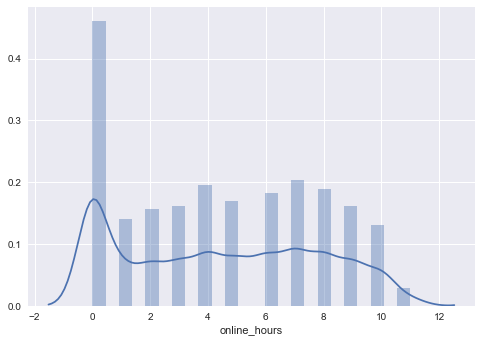

In [47]:
#
sns.distplot(test['online_hours'])

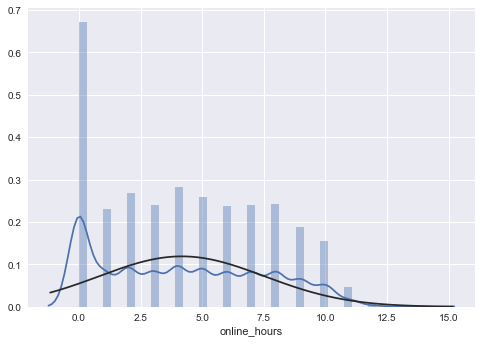

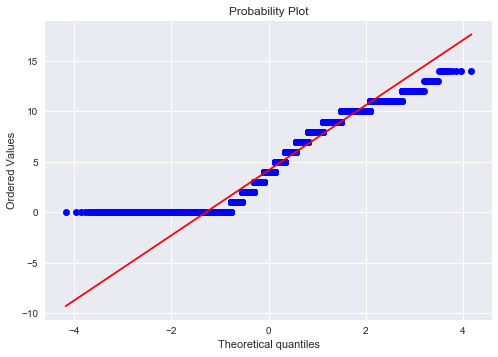

In [103]:
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats
sns.distplot(train['online_hours'],fit=norm);
fig = plt.figure()
res = stats.probplot(train['online_hours'], plot=plt)

In [49]:
### Removing the days for which the pings were > 15 hours (serves as an outlier and might bias the data)
train.head()
len(train[train['online_hours'] >=15.0])
train = train[train['online_hours'] <15.0]

,driver_id,date,online_hours,gender,age,number_of_kids,weekday
index,,,,,,,
0,111556,2017-06-01,2.0,FEMALE,49,4,3
1,111556,2017-06-02,2.0,FEMALE,49,4,4
2,111556,2017-06-03,0.0,FEMALE,49,4,5
3,111556,2017-06-04,0.0,FEMALE,49,4,6
4,111556,2017-06-05,5.0,FEMALE,49,4,0


37

In [51]:
### Training a Linear Regression Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept = False)

X = train[['age', 'number_of_kids', 'weekday']]
Y = train['online_hours']

lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
# print the intercept
print(lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

predictions = lm.predict(X)
plt.scatter(Y,predictions)

5.562244285451006


,Coefficient
age,-0.023688
number_of_kids,0.154436
weekday,-0.251113


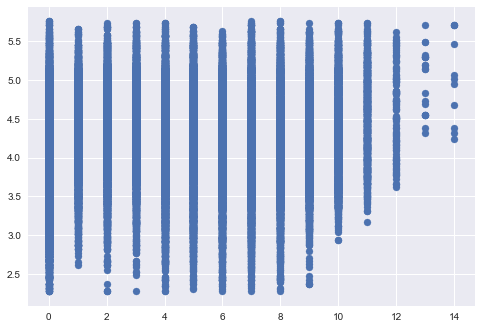

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
1n∑i=1n(yi−ŷ i)2

RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. All of these are loss functions, because we want to minimize them.

In [55]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y, predictions)))

RMSE: 3.2950961114960795


In [59]:
## Creating dummies using pandas for categorical variables
dummies_gender = pd.get_dummies(train.gender)
train = train.join(dummies_gender)

In [60]:
train.head()

,driver_id,date,online_hours,gender,age,number_of_kids,weekday,FEMALE,MALE
index,,,,,,,,,
0,111556,2017-06-01,2.0,FEMALE,49,4,3,1,0
1,111556,2017-06-02,2.0,FEMALE,49,4,4,1,0
2,111556,2017-06-03,0.0,FEMALE,49,4,5,1,0
3,111556,2017-06-04,0.0,FEMALE,49,4,6,1,0
4,111556,2017-06-05,5.0,FEMALE,49,4,0,1,0


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

5.136935296535799

,Coefficient
age,-0.025514
number_of_kids,0.153803
weekday,-0.251510
FEMALE,-1.016619
MALE,1.016619


RMSE: 3.1729383449360284


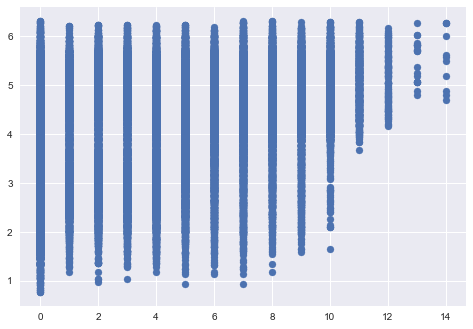

In [105]:
X = train[['age', 'number_of_kids', 'weekday', 'FEMALE', 'MALE']]
Y = train['online_hours']
lm = LinearRegression()
lm.fit(X,Y)

# print the intercept
lm.intercept_

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

predictions = lm.predict(X)
plt.scatter(Y,predictions)

print('RMSE:', np.sqrt(metrics.mean_squared_error(Y, predictions)))

RMSE: 3.198780203115557


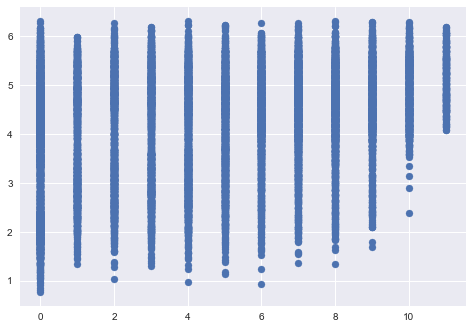

In [106]:
dummies_gender = pd.get_dummies(test.gender)
test = test.join(dummies_gender)
X = test[['age', 'number_of_kids', 'weekday', 'FEMALE', 'MALE']]
Y = test['online_hours']


predictions = lm.predict(X)
plt.scatter(Y,predictions)

print('RMSE:', np.sqrt(metrics.mean_squared_error(Y, predictions)))

In [62]:
## Creating dummies using pandas for categorical variables
dummies_weekday = pd.get_dummies(train.weekday)
train = train.join(dummies_weekday)

In [67]:
train.head()

,driver_id,date,online_hours,gender,age,number_of_kids,weekday,FEMALE,MALE,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
index,,,,,,,,,,,,,,,,
0,111556,2017-06-01,2.0,FEMALE,49,4,3,1,0,0,0,0,1,0,0,0
1,111556,2017-06-02,2.0,FEMALE,49,4,4,1,0,0,0,0,0,1,0,0
2,111556,2017-06-03,0.0,FEMALE,49,4,5,1,0,0,0,0,0,0,1,0
3,111556,2017-06-04,0.0,FEMALE,49,4,6,1,0,0,0,0,0,0,0,1
4,111556,2017-06-05,5.0,FEMALE,49,4,0,1,0,1,0,0,0,0,0,0


In [71]:
train.columns = ['driver_id','date','online_hours','gender',\
                  'age','number_of_kids','weekday','FEMALE',\
                 'MALE','weekday_0', 'weekday_1', 'weekday_2','weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

4.77979674016591

,Coefficient
age,-0.025546
number_of_kids,0.153775
FEMALE,-1.015848
MALE,1.015848
weekday_5,-1.362539
weekday_6,-1.393913


RMSE: 3.1513636337776516


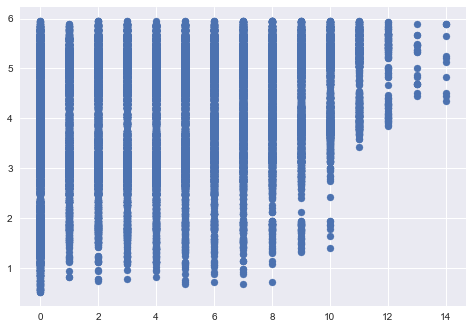

In [107]:
X = train[['age', 'number_of_kids', 'FEMALE', 'MALE', 'weekday_5', 'weekday_6']]
Y = train['online_hours']
lm = LinearRegression()
lm.fit(X,Y)

# print the intercept
lm.intercept_

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

predictions = lm.predict(X)
plt.scatter(Y,predictions)

print('RMSE:', np.sqrt(metrics.mean_squared_error(Y, predictions)))

In [109]:
test.columns


Index([     'driver_id',           'date',   'online_hours',         'gender',
                  'age', 'number_of_kids',        'weekday',         'FEMALE',
                 'MALE',                0,                1,                2,
                      3,                4,                5,                6],
      dtype='object')

RMSE: 3.176544994002183


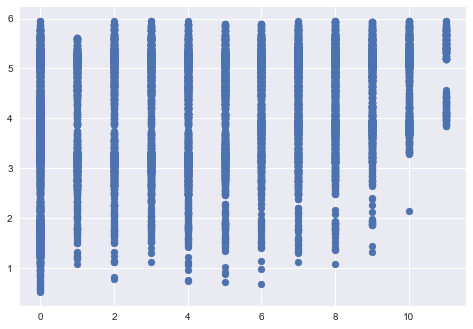

In [110]:
test.columns = ['driver_id','date','online_hours','gender',\
                  'age','number_of_kids','weekday','FEMALE',\
                 'MALE','weekday_0', 'weekday_1', 'weekday_2','weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']
dummies_weekday = pd.get_dummies(test.weekday)
test = test.join(dummies_weekday)
X = test[['age', 'number_of_kids', 'FEMALE', 'MALE', 'weekday_5', 'weekday_6']]
Y = test['online_hours']


predictions = lm.predict(X)
plt.scatter(Y,predictions)

print('RMSE:', np.sqrt(metrics.mean_squared_error(Y, predictions)))

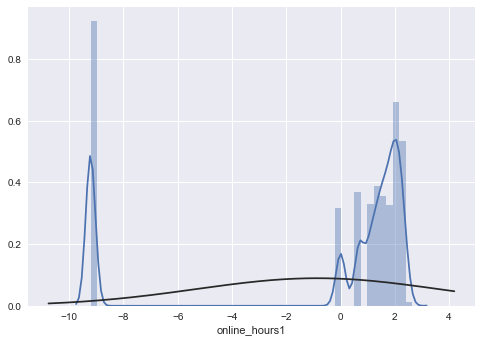

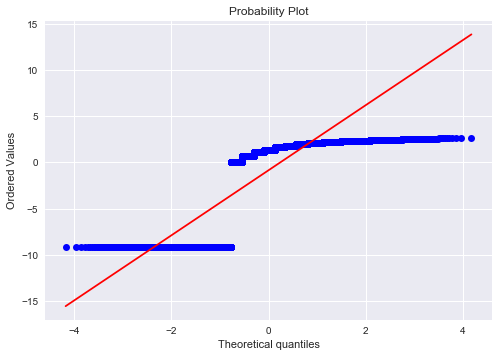

In [111]:
train['online_hours1'] = np.log(train['online_hours'] + 0.0001)
sns.distplot(train['online_hours1'],fit=norm);
fig = plt.figure()
res = stats.probplot(train['online_hours1'], plot=plt)

In [131]:
from sklearn.tree import DecisionTreeRegressor as dtr
# define the training data X...
X = train[['age', 'number_of_kids', 'gender', 'weekday']]
                # 'MALE','weekday_0', 'weekday_1', 'weekday_2','weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']]
Y = train[['online_hours']]
# and the data for the competition submission...
X_test = test[['age', 'number_of_kids',  'gender', 'weekday']]
                 #'MALE','weekday_0', 'weekday_1', 'weekday_2','weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']]
print(X.head())
print(Y.head())

       age  number_of_kids  gender  weekday
index                                      
0       49               4  FEMALE        3
1       49               4  FEMALE        4
2       49               4  FEMALE        5
3       49               4  FEMALE        6
4       49               4  FEMALE        0
       online_hours
index              
0               2.0
1               2.0
2               0.0
3               0.0
4               5.0


In [133]:
from sklearn.model_selection import cross_val_score
# try fitting a decision tree regression model...
DTR_1 = dtr(max_depth=3) # declare the regression model form. Let the depth be default.
# DTR_1.fit(X,Y) # fit the training data
scores_dtr = cross_val_score(DTR_1, X, Y, cv=10,scoring='explained_variance') # 10-fold cross validation
print('scores for k=10 fold validation:',scores_dtr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_dtr.mean(), scores_dtr.std() * 2))

ValueError: could not convert string to float: 'MALE'

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [135]:
# Establish model
model = RandomForestRegressor(n_jobs=-1)

In [143]:
# define the training data X...
X = train[['age', 'number_of_kids', 'FEMALE'\
                ,'MALE','weekday_0', 'weekday_1', 'weekday_2','weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']]
Y = train['online_hours']
# and the data for the competition submission...
X_test = test[['age', 'number_of_kids', 'FEMALE'\
                 ,'MALE','weekday_0', 'weekday_1', 'weekday_2','weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']]
Y_test = test['online_hours']

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

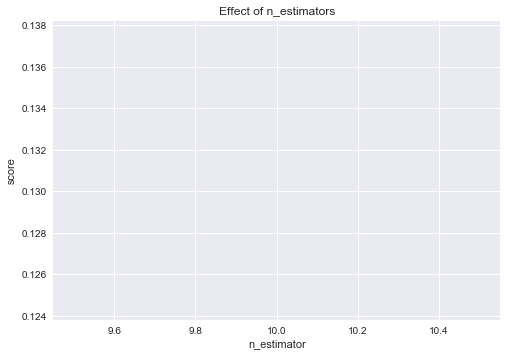

In [144]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 500)
scores = []
for n in estimators:
    model.set_params(n_estimators=n, max_depth = 5)
    model.fit(X, Y)
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [145]:
scores

[0.1310212861480654]

In [146]:
model.score(X_test, Y_test)

0.1310212861480654

In [147]:
model.score(X, Y)

0.13280491704404784

In [152]:
predictions = model.predict(X)

RMSE: 3.1217067873113407


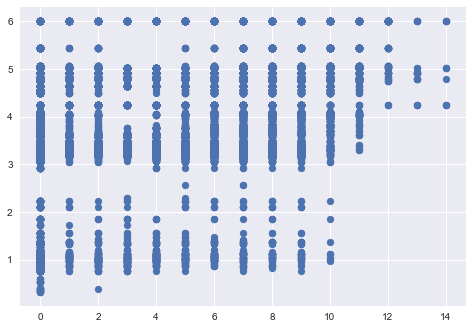

In [153]:
plt.scatter(Y,predictions)

print('RMSE:', np.sqrt(metrics.mean_squared_error(Y, predictions)))